In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:


df1= pd.read_csv('/content/laptopData - laptopData.csv')
df = df1.copy()


Data Inspection

In [5]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1272 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1271 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [8]:
df.shape

(1303, 12)

In [9]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
df.dtypes

,0
Unnamed: 0,float64
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object
OpSys,object


In [11]:
df.isnull().sum()

,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,31
Gpu,30
OpSys,30


In [12]:
df.duplicated().sum()

np.int64(29)

Data Cleaning

In [13]:
df = df.drop_duplicates(keep="first")

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.isnull().sum()

,0
Unnamed: 0,1
Company,1
TypeName,1
Inches,1
ScreenResolution,1
Cpu,1
Ram,1
Memory,2
Gpu,1
OpSys,1


In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


Data Visualization

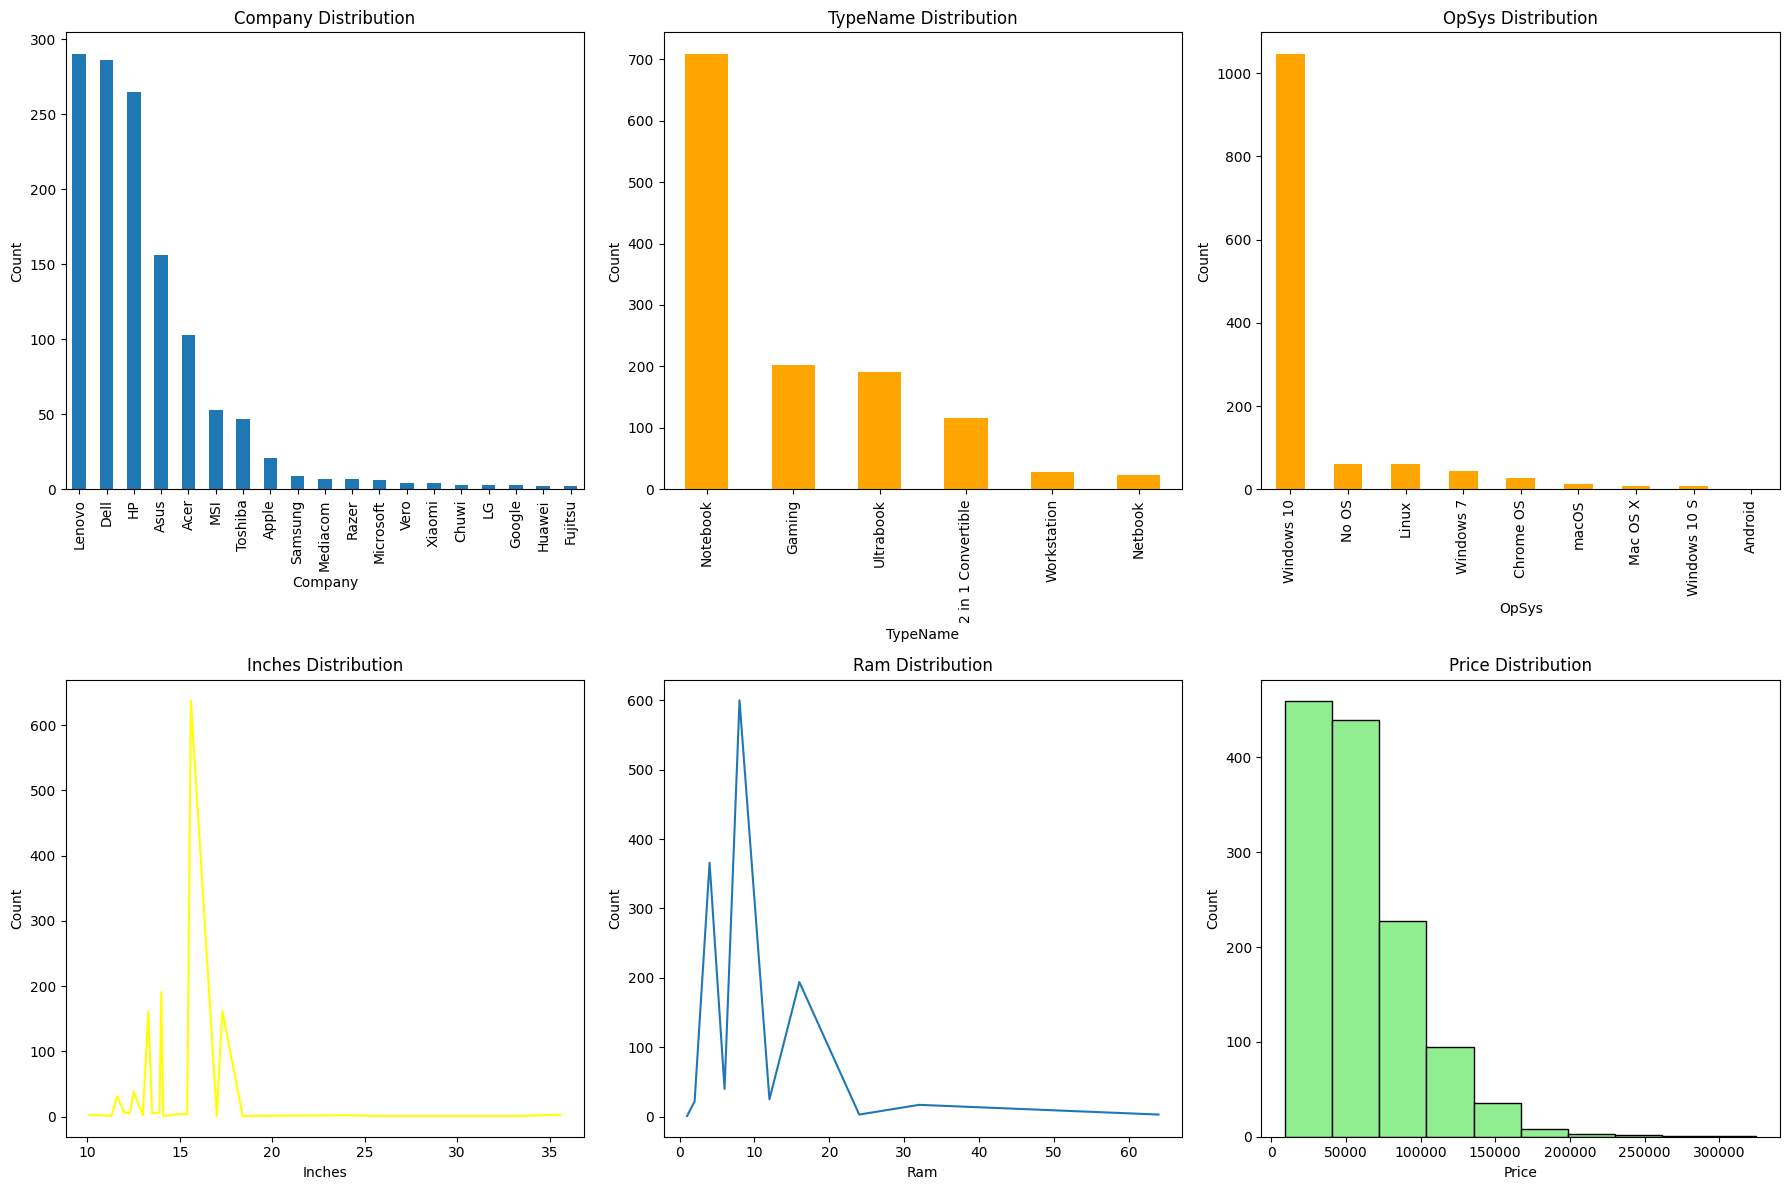

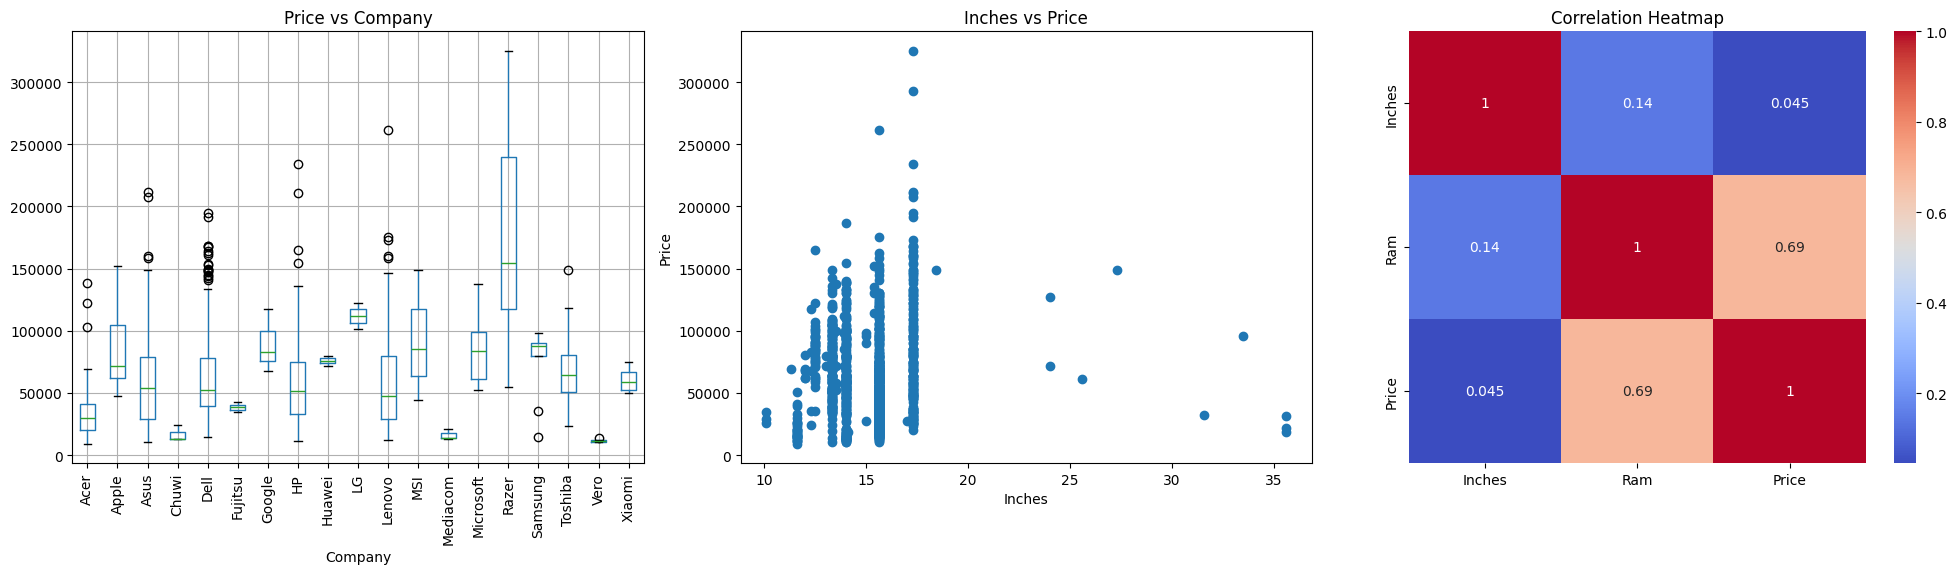

In [18]:


# Convert columns
df["Inches"] = pd.to_numeric(df["Inches"], errors="coerce")
df["Ram"] = df["Ram"].astype(str).str.replace("GB", "")
df["Ram"] = pd.to_numeric(df["Ram"], errors="coerce")

numeric_df = df[["Inches", "Ram", "Price"]]


plt.figure(figsize=(18, 12))

# 1. Company (Bar)
plt.subplot(2, 3, 1)
df['Company'].value_counts().plot(kind='bar')
plt.title('Company Distribution')
plt.xlabel('Company')
plt.ylabel('Count')

# 2. TypeName (Bar)
plt.subplot(2, 3, 2)
df['TypeName'].value_counts().plot(kind='bar', color='orange')
plt.title('TypeName Distribution')
plt.xlabel('TypeName')
plt.ylabel('Count')

# 3. OpSys (Bar)
plt.subplot(2, 3, 3)
df['OpSys'].value_counts().plot(kind='bar', color='orange')
plt.title('OpSys Distribution')
plt.xlabel('OpSys')
plt.ylabel('Count')

# 4. Inches (Line)
plt.subplot(2, 3, 4)
df['Inches'].value_counts().sort_index().plot(kind='line', color='yellow')
plt.title('Inches Distribution')
plt.xlabel('Inches')
plt.ylabel('Count')

# 5. Ram (Line)
plt.subplot(2, 3, 5)
df['Ram'].value_counts().sort_index().plot(kind='line')
plt.title('Ram Distribution')
plt.xlabel('Ram')
plt.ylabel('Count')

# 6. Price (Histogram)
plt.subplot(2, 3, 6)
df['Price'].plot(kind='hist', edgecolor="black", color='lightgreen')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 7. Boxplot – Company vs Price
df.boxplot(column="Price", by="Company", rot=90, ax=axes[0])
axes[0].set_title("Price vs Company")
plt.suptitle("")  # Remove extra title

# 8. Scatter – Inches vs Price
axes[1].scatter(df["Inches"], df["Price"])
axes[1].set_title("Inches vs Price")
axes[1].set_xlabel("Inches")
axes[1].set_ylabel("Price")

# 9. Heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", ax=axes[2])
axes[2].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()







*   From the above analyis most of the people prefer easy to carry light weight notebook type laptops with the price range of 40,000 - 50,000.

*  The most prefered screen size is 15.6 inches.

*   Lenovo, dell and hp are the most preferred brand by the customers.
*   Windows is the most prefered OS.

*  Laptops with 8GB ram is the higly bought by the customers.


*   Higher-end brands tend to be priced significantly above others, laptop prices rise notably with increased RAM, and screen size shows only a weak influence on overall pricing.







